In [26]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "regression_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [29]:
import pandas as pd
penguins = pd.read_csv("data/penguins_pre.csv")

In [30]:
X = penguins.drop(["body_mass_g"], axis=1)
X.rename(columns={"target":"species"}, inplace=True)
y = penguins["body_mass_g"]

In [31]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, X["species"]):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [32]:
# Entrenar modelo
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=1, random_state=42)
tree_reg.fit(train_set, train_y_set)

DecisionTreeRegressor(max_depth=1, random_state=42)

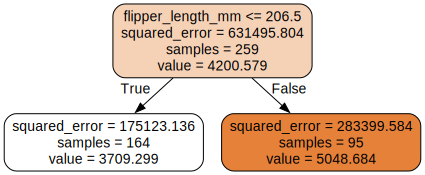

In [33]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree_example.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree_example.dot")

In [25]:
# Replicar con funciones los resultados de este árbol
# Separar por la condición
# Calcular el mse
# Calcular el mse ponderado
# Calcular proporcion de cada hoja para ponderar el mse

In [44]:
dt = train_set[["flipper_length_mm"]].copy()
dt["body_mass"] = train_y_set.copy()

In [ ]:
# Calcular hojas del arbol
# Input: los datos y el punto de corte
##def calcula_hojas(dt, X2):
  #  p1 = dt[dt["X2"]<=X2]["label_real"].value_counts(normalize=True)[0]
   # p2 = dt[dt["X2"]>X2]["label_real"].value_counts(normalize=True)[0]
   # return (p1,p2)


In [48]:
def separa_hoja(dt, c):
    pred1 = dt[dt["flipper_length_mm"]<=c]["body_mass"].mean()
    pred2 = dt[dt["flipper_length_mm"]>c]["body_mass"].mean()
    return (pred1, pred2)
# test
separa_hoja(dt, 206.5)

(3709.298780487805, 5048.684210526316)

In [50]:
def calcula_mse(dt, c, p):
    mse1 = ((dt[dt["flipper_length_mm"]<=c]["body_mass"] - p[0])**2).mean()
    mse2 = ((dt[dt["flipper_length_mm"]>c]["body_mass"] - p[1])**2).mean()
    return (mse1, mse2)
# test
calcula_mse(dt, 206.5, separa_hoja(dt, 206.5))

(175123.1363399762, 283399.58448753465)

In [54]:
def peso_hojas(dt, c):
    peso = len(dt[dt["flipper_length_mm"]<=c])/len(dt)
    return peso
print(peso_hojas(dt, 206.5))
print(164/259)

0.6332046332046332
0.6332046332046332


In [55]:
def calcula_mse_ponderado(mse, pond):
    #Input
    # mse es una tupla, mse[0] es de la hoja izquierda y mse[1] es de la hoja derecha
    # pond: es la proporción de samples en la hoja izquierda (1- pond) es la derecha
    mse_pond = mse[0]*pond + mse[1]*(1-pond)
    return mse_pond


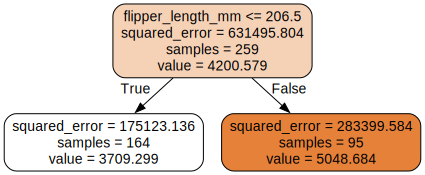

In [61]:
Source.from_file(IMAGES_PATH / "regression_tree_example.dot")

In [65]:
((train_y_set-tree_reg.predict(train_set))**2).mean()

214838.43585355944

In [71]:
c = 206.5
preds = separa_hoja(dt, c)
mse = calcula_mse(dt, c, preds)
pond = peso_hojas(dt, c)
calcula_mse_ponderado(mse, pond)

214838.4358535594

In [72]:
l_mse = []
for c in dt["flipper_length_mm"].unique():
    try:
        preds = separa_hoja(dt, c)
        mse = calcula_mse(dt, c, preds)
        pond = peso_hojas(dt, c)
        l_mse.append(calcula_mse_ponderado(mse, pond))
    except:
        print("caso degenerado")


In [73]:
min(l_mse)

214838.4358535594

In [74]:
# Entrenar modelo
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=1, random_state=42, splitter="random")
tree_reg.fit(train_set, train_y_set)

DecisionTreeRegressor(max_depth=1, random_state=42, splitter='random')

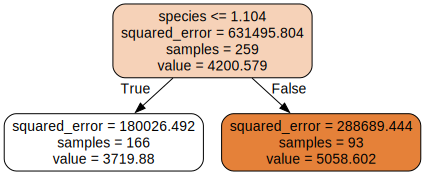

In [75]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree_example_random.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree_example_random.dot")

In [76]:
((train_y_set-tree_reg.predict(train_set))**2).mean()

219044.46281826773

In [77]:
tree_reg.tree_.impurity

array([631495.80358075, 180026.4915082 , 288689.44386634])